# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. 

## Откройте и изучите файл

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [3]:
display(df.describe())
display(df.info())

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

<div class="alert alert-info">
    
<b>Совет</b>
Также важно изучить корреляции в данных. Так мы можем оценить взаимосвязи в данных и влияние параметров на целевой признак. Рекомендую посмотреть метод `sns.pairplot` с параметром hue, в который мы передаем целевой признак. Будет здорово, если ты сможешь это реализовать в текущем или последующих проектах. 

</div>

## Разбейте данные на выборки

In [4]:
df_train, df_valid = train_test_split(df, test_size=0.30, random_state=12345)
df_valid, df_test = train_test_split(df_valid,test_size = 0.5, random_state=12345)
print('Размер обучающей выборки:', df_train.shape[0],'объектов')
print('Размер валидационной выборки:', df_valid.shape[0],'объекта')
print('Размер тестовой выборки:',df_test.shape[0],'объекта')

Размер обучающей выборки: 2249 объектов
Размер валидационной выборки: 482 объекта
Размер тестовой выборки: 483 объекта


<div class="alert alert-block alert-success">
<b>Успех:</b> С разбиением все в порядке, молодец, что проверил размеры полученных выборое. Это иной раз может предостеречь тебя от глупых ошибок
  
</div>

## Исследуйте модели

In [5]:
#Присвоим переменным признаки и целевые признаки
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

#Валидационная выборка
valid_features = df_valid.drop(['is_ultra'], axis=1)
valid_target = df_valid['is_ultra']

#Обучающая выборка
train_features = df_train.drop(['is_ultra'], axis=1)
train_target = df_train['is_ultra']

#Тестовая выборка
test_features = df_test.drop(['is_ultra'], axis=1)
test_target = df_test['is_ultra']

Depth: 1        Accuracy: 0.7510373443983402
Depth: 2        Accuracy: 0.7800829875518672
Depth: 3        Accuracy: 0.7863070539419087
Depth: 4        Accuracy: 0.7883817427385892
Depth: 5        Accuracy: 0.7614107883817427
Depth: 6        Accuracy: 0.7842323651452282
Depth: 7        Accuracy: 0.7821576763485477
Depth: 8        Accuracy: 0.7821576763485477
Depth: 9        Accuracy: 0.7780082987551867




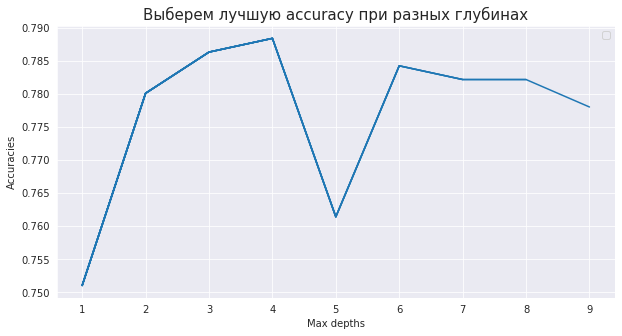

In [6]:
#Обучим модель Дерево Решений и проверим разные глубины
depths = []
DTC_accuracies = []

plt.figure(figsize=(10, 5))

for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(train_features,train_target)
    predictions = model.predict(valid_features)
    score = accuracy_score(valid_target, predictions)
    depths.append(depth)
    DTC_accuracies.append(score)
    print('Depth:', depth, end='')
    print('        Accuracy:', score)
    sns.lineplot(data=pd.DataFrame(data=DTC_accuracies, index=depths),dashes=False)
    plt.legend('')
print('\n')
plt.title("Выберем лучшую accuracy при разных глубинах", fontsize=15) 
plt.ylabel("Accuracies") 
plt.xlabel("Max depths")
plt.show()
print('\n\n')

Depth: 1        Accuracy: 0.7510373443983402
Depth: 2        Accuracy: 0.7800829875518672
Depth: 3        Accuracy: 0.7863070539419087
Depth: 4        Accuracy: 0.7883817427385892
Depth: 5        Accuracy: 0.7614107883817427
Depth: 6        Accuracy: 0.7842323651452282
Depth: 7        Accuracy: 0.7821576763485477
Depth: 8        Accuracy: 0.7821576763485477
Depth: 9        Accuracy: 0.7780082987551867




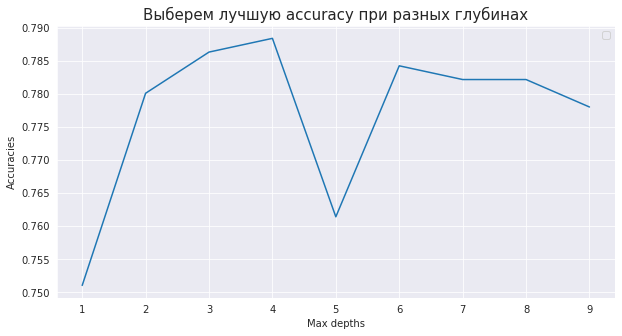

In [7]:
#Обучим модель Дерево Решений и проверим разные глубины
depths = []
DTC_accuracies = []

plt.figure(figsize=(10, 5))

for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(train_features,train_target)
    predictions = model.predict(valid_features)
    score = accuracy_score(valid_target, predictions)
    depths.append(depth)
    DTC_accuracies.append(score)
    print('Depth:', depth, end='')
    print('        Accuracy:', score)
print('\n')
sns.lineplot(data=pd.DataFrame(data=DTC_accuracies, index=depths),dashes=False)
plt.legend('')
plt.title("Выберем лучшую accuracy при разных глубинах", fontsize=15) 
plt.ylabel("Accuracies") 
plt.xlabel("Max depths")
plt.show()
print('\n\n')

Estimator: 10        Accuracy: 0.7780082987551867
Estimator: 15        Accuracy: 0.7842323651452282
Estimator: 20        Accuracy: 0.7904564315352697
Estimator: 25        Accuracy: 0.7883817427385892
Estimator: 30        Accuracy: 0.7863070539419087
Estimator: 35        Accuracy: 0.7925311203319502
Estimator: 40        Accuracy: 0.7946058091286307
Estimator: 45        Accuracy: 0.7904564315352697
Estimator: 50        Accuracy: 0.7904564315352697




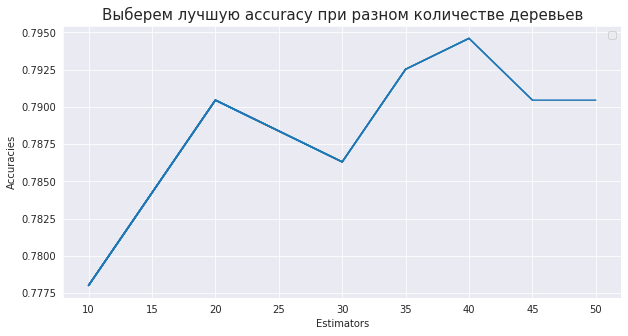

In [8]:
#Обучим модель случайный лес с разным количеством деревьев в лесу.

estimators = []
RFC_accuracies = []
plt.figure(figsize=(10, 5))

for estim in range(10,51,5):
    model = RandomForestClassifier(random_state=12345, n_estimators=estim)
    model.fit(train_features, train_target)
    predictions = model.predict(valid_features)
    score = accuracy_score(valid_target, predictions)
    estimators.append(estim)
    RFC_accuracies.append(score)
    print('Estimator:', estim, end='')
    print('        Accuracy:', score)

    sns.lineplot(data=pd.DataFrame(data=RFC_accuracies, index=estimators),legend='brief')
    plt.legend('')
print('\n')
plt.title("Выберем лучшую accuracy при разном количестве деревьев", fontsize=15) 
plt.ylabel("Accuracies") 
plt.xlabel("Estimators")
plt.show()
print('\n\n')

Neighbors: 1        Accuracy: 0.7261410788381742
Neighbors: 4        Accuracy: 0.7551867219917012
Neighbors: 7        Accuracy: 0.7531120331950207
Neighbors: 10        Accuracy: 0.7593360995850622
Neighbors: 13        Accuracy: 0.7572614107883817
Neighbors: 16        Accuracy: 0.7510373443983402
Neighbors: 19        Accuracy: 0.7551867219917012
Neighbors: 22        Accuracy: 0.7531120331950207
Neighbors: 25        Accuracy: 0.7510373443983402




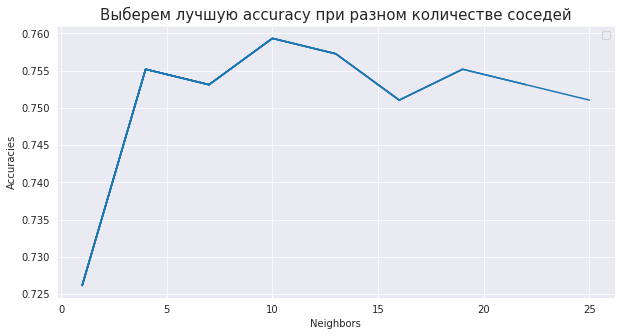

In [9]:
# Обучим модель ближайших соседей
neighbors_list = []
KNC_accuracies = []
plt.figure(figsize=(10, 5))

for neighbors in range(1,28,3):
    model = KNeighborsClassifier(n_neighbors = neighbors)
    model.fit(train_features, train_target)
    predictions = model.predict(valid_features)
    score = accuracy_score(valid_target, predictions)
    neighbors_list.append(neighbors)
    KNC_accuracies.append(score)
    print('Neighbors:', neighbors, end='')
    print('        Accuracy:', score)
    sns.lineplot(data=pd.DataFrame(data=KNC_accuracies, index=neighbors_list),legend='brief')
    plt.legend('')
    
print('\n')
plt.title("Выберем лучшую accuracy при разном количестве соседей", fontsize=15) 
plt.ylabel("Accuracies") 
plt.xlabel("Neighbors")
plt.show()
print('\n\n')

In [10]:
#Создадим таблицу с полученными accuracy
columns=['DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier']

data = pd.DataFrame(columns=columns)
data['DecisionTreeClassifier'] = DTC_accuracies
data['RandomForestClassifier'] = RFC_accuracies
data['KNeighborsClassifier'] = KNC_accuracies

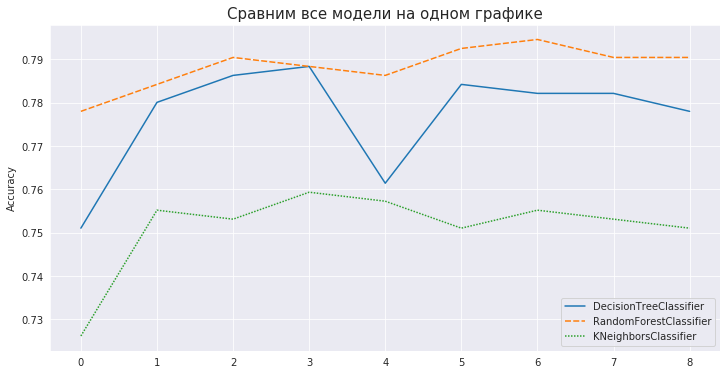

In [11]:
#Отрисуем график, чтобы наглядно увидеть, какая модель нас больше устраивает
plt.figure(figsize=(12,6))
plt.title('Сравним все модели на одном графике', fontsize=15)
plt.xlabel('')
plt.ylabel('Accuracy')
sns.lineplot(data=data)

**Вывод:**
* Исследовали три модели : Случайный лес, Ближайшие соседи, Дерево решений
* После исследования мы получили:
    * У дерева решений при 4 деревьях accuracy: 0.7883817427385892
    * У ближайших соседей при 10 соседях accuracy: Neighbors: 10 Accuracy: 0.7593360995850622
    * У случайного леса при 40 деревьях, accuracy 0.7946058091286307
    
Исходя из полученных результатов на данный момент, можно сказать, что модель "Случайный лес" показывает лучший результат : при 40 деревьях, Accuracy: 0.7946058091286307

## Проверьте модель на тестовой выборке

In [12]:
#Проверим модель: Случайный лес на тестовой выборке при 40 деревьях
model = RandomForestClassifier(random_state=12345, n_estimators=40)
model.fit(train_features,train_target)
predictions = model.predict(test_features)
score = accuracy_score(test_target, predictions)
print('Accuracy:', score)

Accuracy: 0.7805383022774327


## (бонус) Проверьте модели на адекватность

In [13]:
df['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

Пусть наша модель всегда будет предсказывать тариф «Смарт». Тогда точность модели будет равна примерно 69%, но точность нашей лучшей модели больше и равна 78%. Можем заключить, что проверка на адекватность пройдена успешно